In [4]:
import xarray as xr
import glob
import funcs_DS_eval as fdse
import funcs_weather_typing as fwt
import importlib
importlib.reload(fdse)
import numpy as np
import xesmf

In [5]:
regions, bukods = fdse.make_buko_region_map('icargrid', COMPUTE=False)

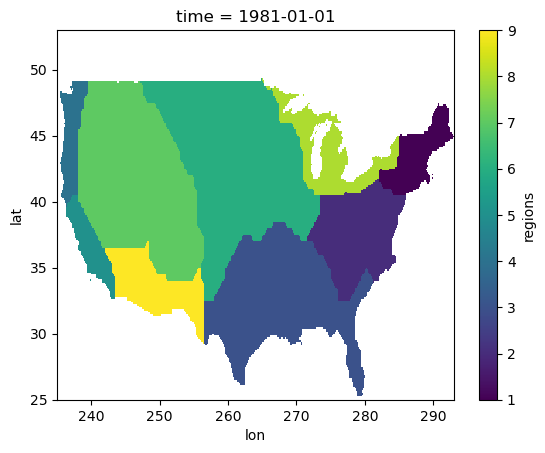

In [ ]:


# regions, bucods, mask = fdse.make_buco_region_map()
# TimeStart = '1981-01-01'
# TimeEnd = '2016-12-31'
# nWTs = 6
# VariableList = fwt.get_regional_WT_varlist()
# # lonmin, lonmax, latmin, latmax = fdse.get_region_edges(mask, regions)
# gridtar = xr.open_dataset('/glade/campaign/ral/hap/nlybarger/gridtar.nc')
# bucods = bucods.rename({'mask': 'regions'})
# bucods['mask'] = xr.where(np.isnan(bucods['regions']), np.nan, 1.)
# regr = xesmf.Regridder(bucods, gridtar, 'nearest_s2d')
# targ = regr(bucods)
# targ = targ.where(~np.isnan(gridtar['mask']))
# # Select indices for longitude and latitude ranges
# lon_mask = (targ.lon >= 276) & (targ.lon <= 285)
# lat_mask = (targ.lat >= 40) & (targ.lat <= 45)

# # Get the mask array
# mask_arr = targ['regions'].values

# # Find nan locations
# nan_mask = np.isnan(mask_arr)

# # Add some areas around the Great Lakes to that region, especially around Ohio and New York 
# region_mask = np.zeros_like(mask_arr, dtype=bool)
# for i, lat_val in enumerate(targ.lat.values):
#     if not lat_mask[i]:
#         continue
#     for j, lon_val in enumerate(targ.lon.values):
#         if not lon_mask[j]:
#             continue
#         # Check if within 8 pixels of a Great Lake (only checking to the left and
#         # above since otherwise we catch some pixels within 8 pixels of the Atlantic Ocean)
#         i_min = i
#         i_max = min(i + 8, mask_arr.shape[0])
#         j_min = max(j - 8, 0)
#         j_max = j
#         if np.any(nan_mask[i_min:i_max, j_min:j_max]):
#             region_mask[i, j] = True
# targ['regions'].values[region_mask] = 8


# # Add some areas in the Desert Southwest to that region, especially the very Southern Rockies
# lon_mask_9 = (targ.lon >= 251) & (targ.lon <= 255)
# lat_mask_9 = (targ.lat >= 32) & (targ.lat <= 34)

# for i, lat_val in enumerate(targ.lat.values):
#     if not lat_mask_9[i]:
#         continue
#     for j, lon_val in enumerate(targ.lon.values):
#         if lon_mask_9[j]:
#             targ['regions'].values[i, j] = 9
# targ = targ.where(~np.isnan(gridtar['mask']))


# # Smooth borders between regions using a mode filter, but only on valid region values (1-9)
# # Otherwise they are very sawtoothy
# def mode_filter(arr, size=3):
#     def mode_func(x):
#         vals = x[~np.isnan(x)]
#         if len(vals) == 0:
#             return np.nan
#         counts = np.bincount(vals.astype(int))
#         return np.argmax(counts)
#     return generic_filter(arr, mode_func, size=size, mode='nearest')

# # Apply mode filter to smooth borders, but only on valid region values (1-9)
# mask_vals = targ['regions'].values.copy()
# smoothed_mask = np.where(np.isnan(mask_vals), np.nan, mode_filter(mask_vals, size=3))
# targ['regions'].values[:] = smoothed_mask

# dummygrid = xr.Dataset(
#     data_vars = dict(
#     ),
#     coords = dict(
#         lon = (['lon'], np.arange(230,300+1,1, dtype=np.float32)),
#         lat = (['lat'], np.arange(20,52+1,1, dtype=np.float32)),
#     ),
# )

# regr = xesmf.Regridder(targ, dummygrid, 'nearest_s2d')
# targ_regridded = regr(targ)



/glade/u/home/nlybarger/miniconda3/envs/geoanalysis/lib/python3.12/site-packages/xesmf/smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


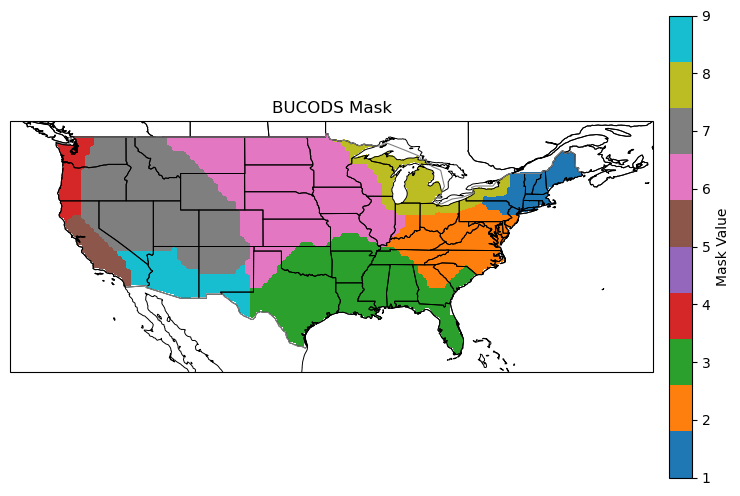

In [136]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([bucods.lon.min(), bucods.lon.max(), bucods.lat.min(), bucods.lat.max()], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.7)
ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.8)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.7)

color = plt.cm.tab10(0)
mesh = ax.pcolormesh(targ.lon, targ.lat, targ['regions'], cmap='tab10', shading='auto', transform=ccrs.PlateCarree())
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Mask Value')
cbar.set_ticks(np.arange(1, 10))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('BUCODS Mask')
plt.show()


In [ ]:
# destgrid = make_grid(230,300,20,52)


In [134]:
targ.to_netcdf('/glade/campaign/ral/hap/nlybarger/bukods_icargrid.nc')

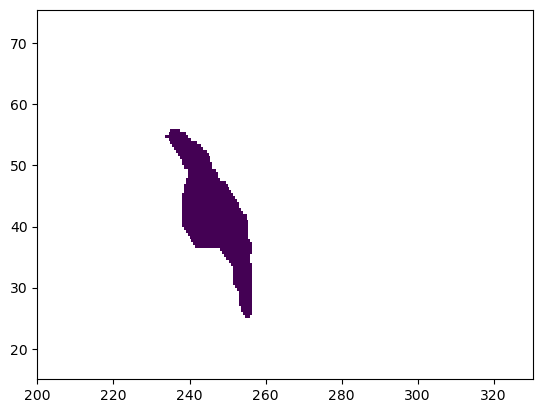

In [33]:
plt.pcolormesh(mask['Mountain West']['lon'], mask['Mountain West']['lat'], mask['Mountain West']['mask'], shading='auto')

In [7]:
import numpy as np
gridtar['mask'] = xr.where(~np.isnan(gridtar['pr']), 1.0, np.nan)

In [17]:
gridtar.to_netcdf('/glade/campaign/ral/hap/nlybarger/gridtar.nc')

In [19]:
gridtar['mask']

<xarray.DataArray 'mask' (lat: 224, lon: 464)> Size: 831kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(224, 464))
Coordinates:
    time     datetime64[ns] 8B 1981-01-01
  * lon      (lon) float64 4kB 235.1 235.2 235.3 235.4 ... 292.7 292.8 292.9
  * lat      (lat) float64 2kB 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94

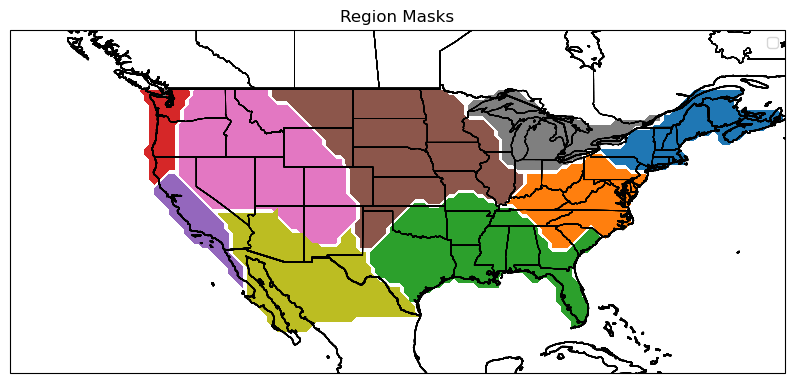

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
for region in regions:
    # Extract mask for the region and plot where mask is True
    region_mask = mask[region]['mask'].values
    lat = mask[region]['lat'].values
    # Assign a unique color for each region using matplotlib's tab10 colormap
    color = plt.cm.tab10(regions.index(region) % 10)
    # Draw colors from tab10 colormap
    color = plt.cm.tab10(regions.index(region) % 10)


    ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([221,300, 20, 55], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.7)

    lon = mask[region]['lon'].values
    lat = mask[region]['lat'].values
    # Add Mexico country borders
    ax.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.8)
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.7)
    ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'admin_0_countries', '50m',
                                                edgecolor='black', facecolor='none', linewidth=1.0),
                   zorder=2)
    lat_2d = np.repeat(lat[:, np.newaxis], lon.shape[0], axis=1)

    region_mask = mask[region]['mask'].values
    region_mask = np.where(lat_2d >= 49, np.nan, region_mask)  # Set mask to 0 for latitudes >= 51
    mesh = ax.contourf(lon, lat, region_mask, levels=[0.5, 1.5], alpha=1.0, colors=[color], transform=ccrs.PlateCarree())
    # lon = mask[region]['lon'].values
    # plt.contourf(lon, lat, region_mask, levels=[0.5, 1.5], alpha=0.5, label=region)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Region Masks')
plt.legend(regions)
plt.show()

In [16]:
lonmax

{'North Atlantic': 299.75,
 'Mid Atlantic': 285.75,
 'Gulf Coast': 281.25,
 'Pacific Northwest': 239.25,
 'Pacific Southwest': 244.75,
 'Northern Plains': 273.25,
 'Mountain West': 256.25,
 'Great Lakes': 287.25,
 'Desert Southwest': 262.75}

In [8]:
lonmax

{'North Atlantic': 299.75,
 'Mid Atlantic': 285.75,
 'Gulf Coast': 281.25,
 'Pacific Northwest': 239.25,
 'Pacific Southwest': 244.75,
 'Northern Plains': 273.25,
 'Mountain West': 256.25,
 'Great Lakes': 287.25,
 'Desert Southwest': 262.75}

In [19]:
import numpy as np
import pandas as pd

# Get the valid_time coordinate as a pandas DatetimeIndex
times = pd.to_datetime(a['valid_time'].values)

# Find indices where the date is Feb 29 (leap day)
leap_day_mask = (times.month == 2) & (times.day == 29)
leap_day_indices = np.where(leap_day_mask)[0]

# Create an array of all indices
all_indices = np.arange(len(times))

# Indices if leap days were skipped
# Create a new array where each leap day removal shifts subsequent indices down by 1
indices_without_leap_days = np.arange(len(times) - len(leap_day_indices))
shift = 0
result = []
leap_set = set(leap_day_indices)
for i in range(len(times)):
    if i in leap_set:
        shift += 1
    else:
        result.append(i - shift)
indices_without_leap_days = np.array(result)

print("Number of leap days:", len(leap_day_indices))
print("Original number of days:", len(all_indices))
print("Number of days without leap days:", len(indices_without_leap_days))
print("Indices without leap days:", indices_without_leap_days)

Number of leap days: 10
Original number of days: 13515
Number of days without leap days: 13505
Indices without leap days: [    0     1     2 ... 13502 13503 13504]


In [29]:
shift = np.searchsorted(leap_day_indices, 59, side='right')
print(shift)

1


In [25]:
leap_day_indices

array([   59,  1520,  2981,  4442,  5903,  7364,  8825, 10286, 11747,
       13208])